In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # progress indicator
#import matplotlib
#matplotlib.use("nbagg")   #подключить эти пакеты для анимации

## Выделение гармонической части гамильтониана
$\frac{H}{E_J}=\frac{p^2}{2ME_J}+\frac{(\varphi-\varphi_{ex})^2}{2lq}+(1-\cos{\varphi})$

Считаем, что импульс в единицах $p_{old} = p_{new}\sqrt{ME_J}$, тогда 
$\frac{p_{old}^2}{2ME_J} = \frac{p_{new}^2}{2} =\frac{p^2}{2} $, а координата $\varphi_{old} = \varphi_{new}\sqrt{lq} = \varphi\sqrt{lq}$.

$\frac{H}{E_J}=\frac{p^2}{2}+\frac{\varphi^2}{2}-\frac{\varphi_{ex}\varphi}{\sqrt{lq}}+\frac{\varphi_{ex}^2}{2lq}+(1-\cos{\varphi\sqrt{lq}})$

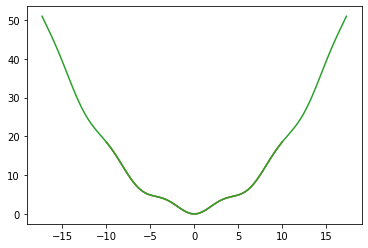

In [73]:
# phix - сдвиг по координате. перенормировка переменной будет влиять на пареметры phix?
def U(phi):
    return (phi - phix)**2/(2*lq) + 1 - np.cos(phi)

def U1(phi):
    return phi**2/2 - phi*phix/np.sqrt(lq) + phix**2/(2*lq) + 1 - np.cos(phi*np.sqrt(lq))

phix = 0#np.pi
lq = 3
x = np.linspace(-10,10,100)
plt.plot(x, U(x))
plt.plot(x, U1(x/np.sqrt(lq))) #обратная замена переменных, новую выражаем через старую
plt.plot(x*np.sqrt(lq), U1(x)) #обратная замена переменных, новую выражаем через старую
plt.show()

## Переход к операторам рождения и уничтожения

$x_{new} = \frac{a+a^+}{\sqrt2}$

$\frac{H}{E_J} = N + (3/2+\frac{\varphi_{ex}^2}{2lq})E - \frac{\varphi_{ex}}{\sqrt{2lq}}(a+a^+) -\cos(\sqrt{\frac{lq}{2}}(a+a^+)
) $

In [77]:
S = 1000 #размерность матрицы   
# параметры графика
width = 8
high = 6

In [78]:
def N(S):
    N = np.zeros((S,S))
    for i in range(1,S):
        N[i][i] = i
    return N

def a_crtn(S):
    a_crtn = np.zeros((S,S))
    for i in range(1,S):
        a_crtn[i-1][i] = np.sqrt(i)
    return a_crtn
    
def a_anh(S):
    a_anh = np.zeros((S,S))
    for i in range(1,S):
        a_anh[i][i-1] = np.sqrt(i)
    return a_anh
# используем в основном a_crtn + a_anh = a

def a(S):
    a = np.zeros((S,S))
    for i in range(1,S):
        a[i-1][i] = a[i][i-1] = np.sqrt(i)
    return a
H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - phix/np.sqrt(2*lq)*a(S)-np.cos(np.sqrt(lq/2)*a(S))


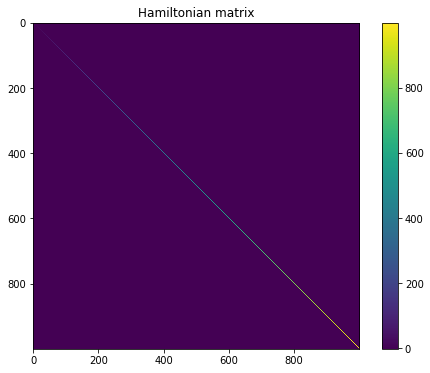

In [79]:
plt.figure(figsize=(width,high))
plt.imshow(H)#, interpolation="bicubic")
plt.title("Hamiltonian matrix")
plt.colorbar()
plt.show()

In [93]:
eigvals, eigvecs = np.linalg.eigh(H)

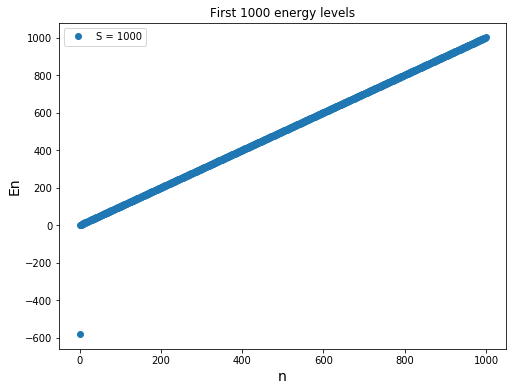

In [94]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals[:en_plot_num], 'o',label="S = {}".format(S))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

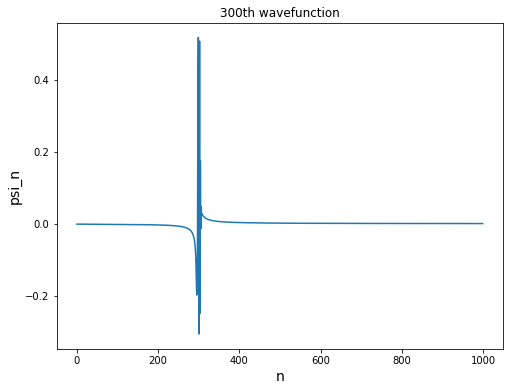

In [95]:
n_curr = 300
plt.figure(figsize=(width,high))
plt.plot(eigvecs[:, n_curr], label="S = {}".format(S))
#plt.plot(eigvecs[:, n_curr]**2)
plt.xlabel("n",size=14)
plt.ylabel("psi_n",size=14)
plt.title("{}th wavefunction".format(n_curr))
plt.show()

## Случай гармонического осциллятора
H_ho = N + 1/2

In [84]:
H_ho = N(S) + 0.5*np.eye(S)
eigvals_ho, eigvecs_ho = np.linalg.eigh(H_ho)

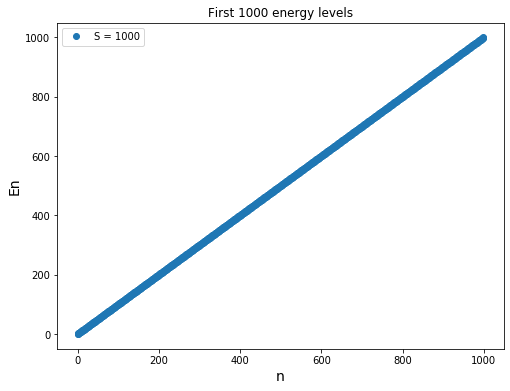

In [85]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals_ho[:en_plot_num],"o", label="S = {}".format(S))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

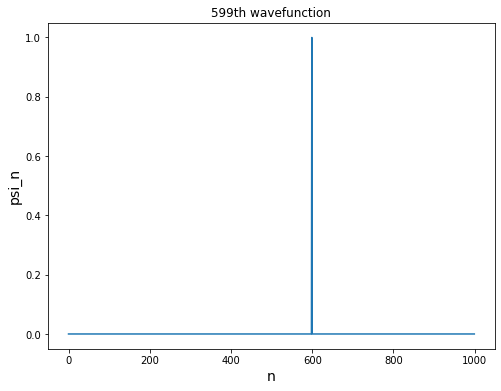

In [86]:
n_curr = 599
plt.figure(figsize=(width,high))
plt.plot(eigvecs_ho[:, n_curr], label="S = {}".format(S))
#plt.plot(eigvecs[:, n_curr]**2)
plt.xlabel("n",size=14)
plt.ylabel("psi_n",size=14)
plt.title("{}th wavefunction".format(n_curr))
plt.show()

## Гармонический осциллятор, но с дбавлением косинуса
$H_{hoo} = N + 1/2 - cos(\sqrt{\frac{lq}{2}}(a+a^+)$

In [87]:
H_hoo = N(S) + 0.5*np.eye(S) - np.cos(np.sqrt(lq/2)*a(S))
eigvals_hoo, eigvecs_hoo = np.linalg.eigh(H_hoo)

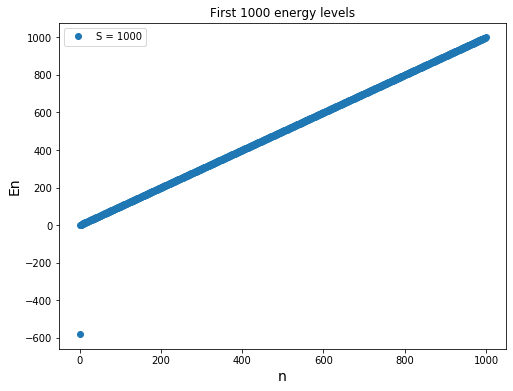

In [88]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals_hoo[:en_plot_num],"o", label="S = {}".format(S))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()